# Airbnb Hotel booking Analysis Project

# Problem Statement

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ar = pd.read_excel(r'C:\Users\ACER\Downloads\1730285881-Airbnb_Open_Data.xlsx')

In [62]:
ar.head(3)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN


In [63]:
ar.isnull().sum()[ar.isnull().sum()>0]

NAME                                 270
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules                        54843
license                           102597
dtype: int64

In [64]:
ar.shape

(102599, 26)

In [65]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

# DATA CLEANING 

In [67]:
 ar.drop_duplicates(inplace=True)

In [68]:
ar.drop(['house_rules','license'],axis=1 ,inplace=True)

In [69]:
ar['price'].unique()

array([ 966.,  142.,  620., ..., 1184.,  905.,  309.])

In [70]:
ar['price']=ar['price'].astype(str).str.replace('$','',regex= False)
ar['service fee ']=ar['service fee'].astype(str).str.replace('$','',regex= False)

ar['price']=ar['price'].astype(str).str.replace(',','',regex= False)
ar['service fee ']=ar['service fee'].astype(str).str.replace(',','$','',regex= False)

In [71]:
ar.rename(columns={'price':'price_$','service fee':'service_fee_$'},inplace=True)
# ar.dropna(inplace=True)

In [72]:
ar['id']=ar['id'].astype(str)

In [73]:
ar.loc[ar['neighbourhood group']=='brookln','neighbourhood group']='Brooklyn'

In [74]:
ar.loc[ar['neighbourhood group']=='manhatan','neighbourhood group']='Manhattan'

In [75]:
ar.drop(ar[ar['availability 365']>500].index,inplace=True)

In [76]:
ar.duplicated().value_counts()

False    102057
Name: count, dtype: int64

In [78]:
ar.describe()

,host id,lat,long,instant_bookable,Construction year,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,service fee
count,1.020570e+05,102049.000000,102049.000000,101952.000000,101843.000000,101784.000000,101657.000000,101874.000000,86225,86239.000000,101738.000000,101738.000000,101609.000000,0.0
mean,4.926729e+10,40.728097,-73.949652,0.497940,2012.488124,125.038149,8.126691,27.515941,2019-06-11 02:12:21.084372224,1.375387,3.278716,7.937005,141.009192,NaN
min,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000,NaN
25%,2.459916e+10,40.688730,-73.982580,0.000000,2007.000000,68.000000,2.000000,1.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,3.000000,NaN
50%,4.912811e+10,40.722290,-73.954440,0.000000,2012.000000,125.000000,3.000000,7.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,96.000000,NaN
75%,7.400636e+10,40.762760,-73.932350,1.000000,2017.000000,183.000000,5.000000,31.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,268.000000,NaN
max,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,426.000000,NaN
std,2.853754e+10,0.055852,0.049502,0.499998,5.765855,66.325303,30.616844,49.567848,NaN,1.748018,1.285084,32.266507,134.974755,NaN


# Exploratory Data Analysis

# What are different property types in the dataset?

In [81]:
ar['room type'].unique()
property_types=ar['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,53428
Private room,46306
Shared room,2208
Hotel room,115


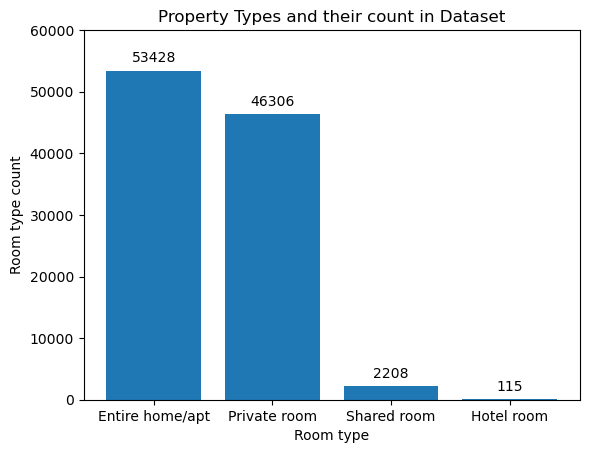

In [82]:
room_type_bar=plt.bar(property_types.index,property_types.loc[:,"count"]);
plt.bar_label(room_type_bar,labels=property_types.loc[:,"count"],padding=4);
plt.ylim([0,60000]);
plt.xlabel('Room type');
plt.ylabel('Room type count');
plt.title('Property Types and their count in Dataset');

# Which Neighborhood has highest number of listings

In [85]:
ar['neighbourhood group'].unique()
hood_group=ar['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,43557
Brooklyn,41631
Queens,13197
Bronx,2694
Staten Island,949


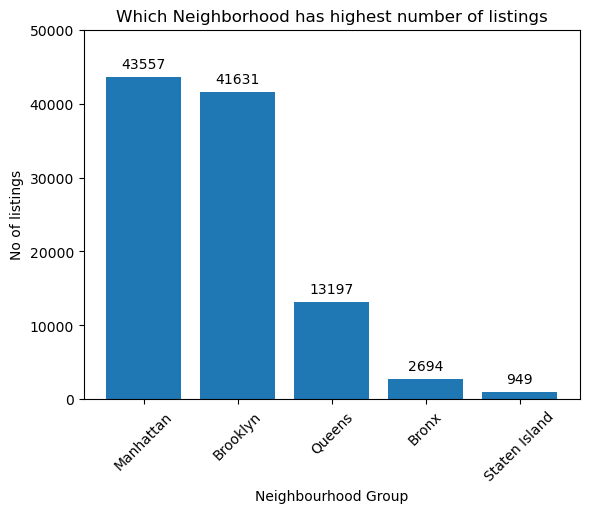

In [86]:
hood_group_bar=plt.bar(hood_group.index,hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar,labels=hood_group.loc[:,"count"],padding=4);
plt.ylim([0,50000]);
plt.xlabel('Neighbourhood Group');
plt.xticks(rotation=45);
plt.ylabel('No of listings');
plt.title('Which Neighborhood has highest number of listings');

# Which neighborhoods group have highest average prices for Airbnb listings?

In [95]:
ar['price_$']=ar['price_$'].astype(float)

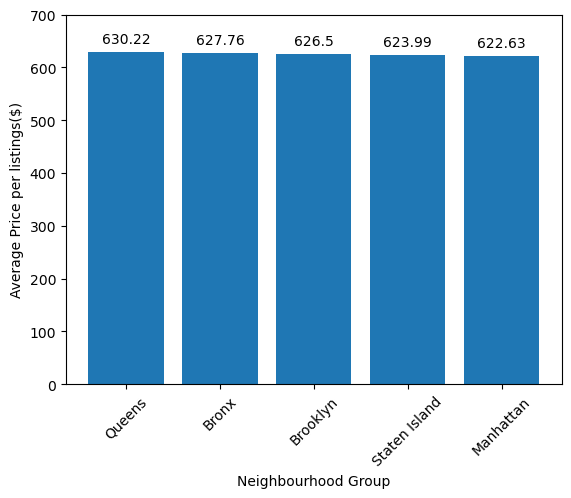

In [107]:
avg_price=ar.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,'price_$']);
plt.bar_label(avg_price_bar,labels=round(avg_price.loc[:,'price_$'],2),label_type='edge',padding=4);
plt.ylim(0,700);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Price per listings($)');
plt.xticks(rotation=45);


# Is there any relationship between constrution year  of property year and price ?

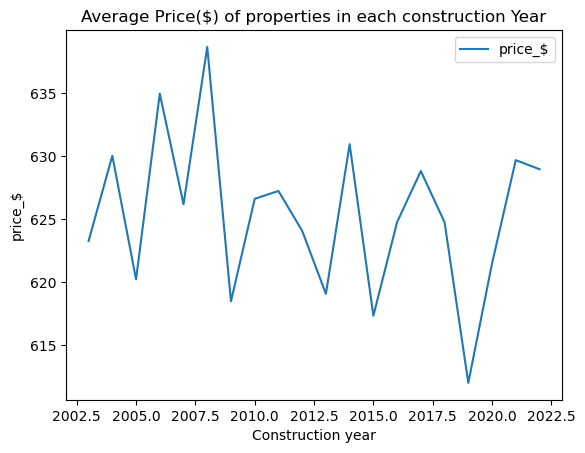

In [126]:
ar.groupby(ar['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction year');
plt.ylabel('price_$');
plt.title('Average Price($) of properties in each construction Year');

# Who are top 10 host by calculated host listing count?

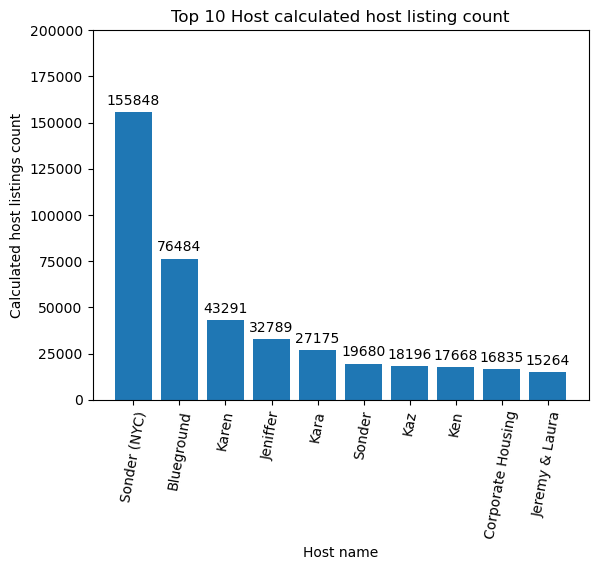

In [143]:
hosts=ar.groupby('host name')['calculated host listings count'].sum().sort_values(ascending= False).nlargest(10).to_frame()
hosts_bar=plt.bar(hosts.index,host.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar,label=hosts.loc[:,'calculated host listings count'],label_type='edge',padding=3);
plt.xlabel('Host name');
plt.ylabel('Calculated host listings count');
plt.xticks(rotation=80);
plt.ylim([0,200000]);
plt.title('Top 10 Host calculated host listing count');

# Are hosts with verified identities more likely to receive positive reviews

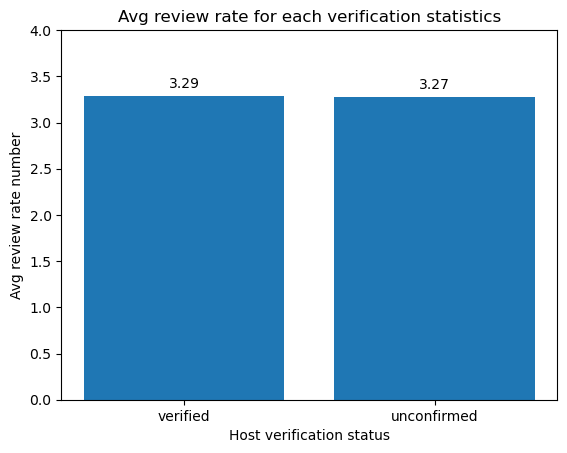

In [154]:
review=ar.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review_bar=plt.bar(review.index,review.loc[:,'review rate number']);
plt.bar_label(review_bar,labels=round(review.loc[:,'review rate number'],2),padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host verification status');
plt.ylabel('Avg review rate number');
plt.title('Avg review rate for each verification statistics');

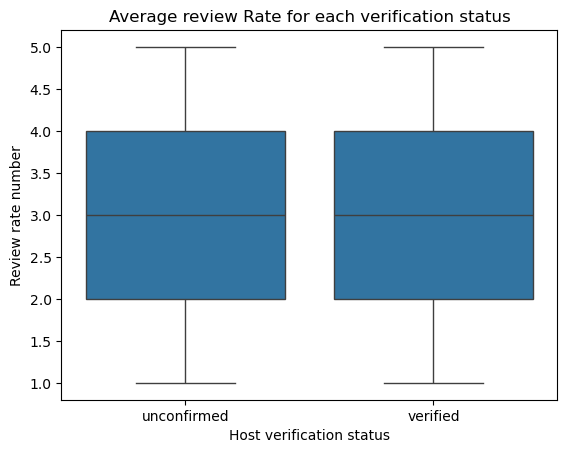

In [166]:
sns.boxplot(data=ar,x='host_identity_verified', y ='review rate number',color= base_color);
plt.xlabel('Host verification status');
plt.ylabel('Review rate number');
plt.title('Average review Rate for each verification status');

# Is there correlation between its price & service Fee?

In [183]:
correlation = ar['price_$'].corr(ar['service_fee_$'])
print(correlation)

0.9999908752435227


Text(0.5, 0, 'A Regression plot showing the correlation of the price and its service fee')

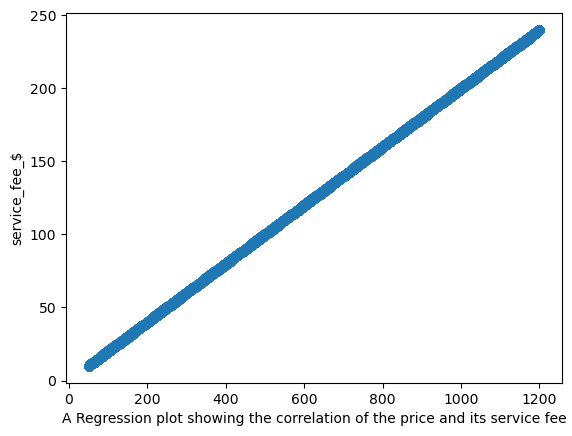

In [187]:
sns.regplot(ar,x='price_$',y='service_fee_$');
plt.xlabel('price_$')
plt.ylabel('service_fee_$')
plt.xlabel('A Regression plot showing the correlation of the price and its service fee')

# What is the average review rate number(eg Stars) for listings and does it vary based on the neighbourhood group and room type?

In [190]:
ARRN=ar.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.346154
                    Private room               3.326873
                    Shared room                3.260870
Brooklyn            Entire home/apt            3.249963
                    Hotel room                 3.857143
                    Private room               3.263716
                    Shared room                3.334957
Manhattan           Entire home/apt            3.275803
                    Hotel room                 3.500000
                    Private room               3.277431
                    Shared room                3.254199
Queens              Entire home/apt            3.349306
                    Hotel room                 3.750000
                    Private room               3.315584
                    Shared room                3.369748
Staten Island       Entire home/apt            3.329087
                    Private room               3.477024
                    Shared room                3.533333

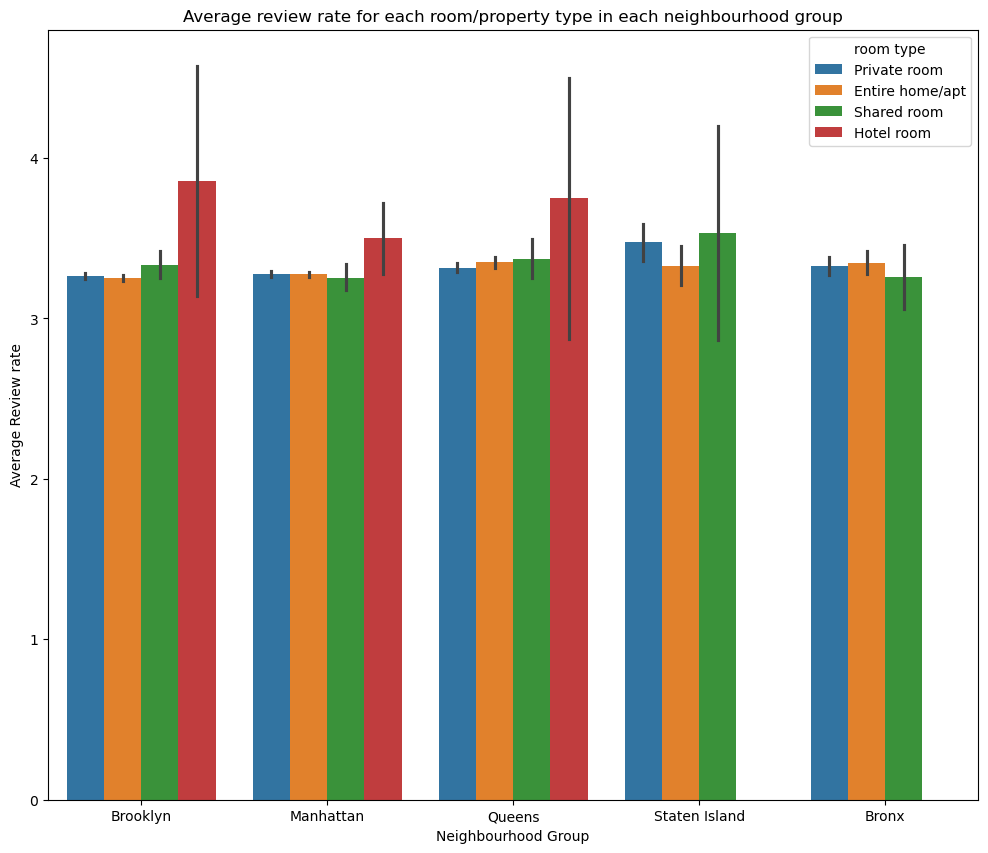

In [194]:
plt.figure(figsize=[12,10]);
sns.barplot(data=ar, x='neighbourhood group',y='review rate number',hue='room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review rate');
plt.title('Average review rate for each room/property type in each neighbourhood group');

# Are hosts with highest calculated host listings count more likely to maintain higher availability throughout the year?

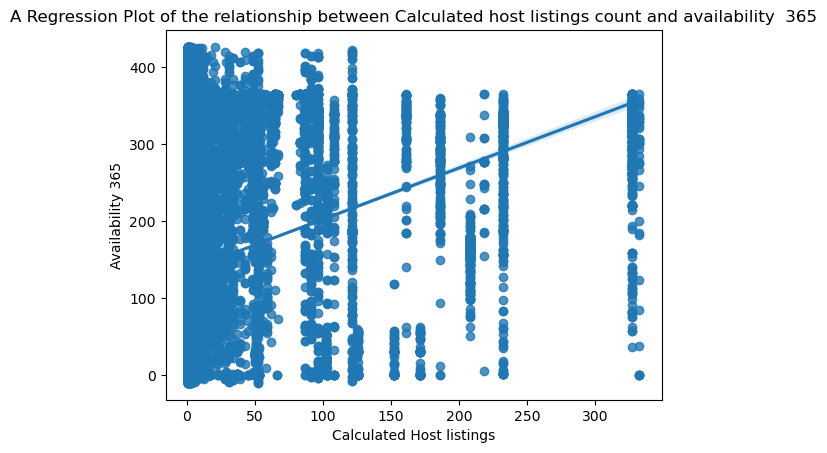

In [205]:
sns.regplot(ar,x='calculated host listings count',y='availability 365');
plt.xlabel('Calculated Host listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the relationship between Calculated host listings count and availability  365');


In [211]:
ar['calculated host listings count'].corr(ar['availability 365'])

0.1595989131431356

# CONCLUSION